## Assignment2 - Supervised Learning flow

### Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [1]:
# student 1: Roee Levi 6852
# student 2: Liel Ziv 1353
# student 3: Inbar Nadav 5908


## Part 2 - Experiments
You could add as many code cells as needed

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import GridSearchCV, cross_val_score


In [3]:
train_data = pd.read_csv('titanic_train.csv')
test_data = pd.read_csv('titanic_test.csv')


In [4]:
train_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,54.0,1,0,78.2667,1,1
1,2,0,45.0,0,0,13.5000,0,1
2,3,1,20.0,0,0,9.5000,0,0
3,3,1,36.0,0,0,7.8958,0,0
4,3,1,22.0,0,0,8.0500,0,0


In [5]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,35.000000,0,0,7.0500,0,0
1,3,1,30.000000,0,0,7.2500,0,0
2,3,1,29.699118,0,0,14.5000,0,0
3,3,0,21.000000,0,0,7.7500,2,0
4,3,1,32.000000,0,0,56.4958,0,1


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    int64  
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    int64  
 7   Survived  712 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 44.6 KB


In [7]:
train_data.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,2.294944,0.640449,29.531213,0.528090,0.384831,32.379429,0.372191,0.394663
std,0.841990,0.480206,13.188028,1.055052,0.803085,49.836074,0.649970,0.489122
min,1.000000,0.000000,0.670000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.750000,0.000000,22.000000,0.000000,0.000000,7.925000,0.000000,0.000000
50%,3.000000,1.000000,29.699118,0.000000,0.000000,14.500000,0.000000,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,1.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000,1.000000


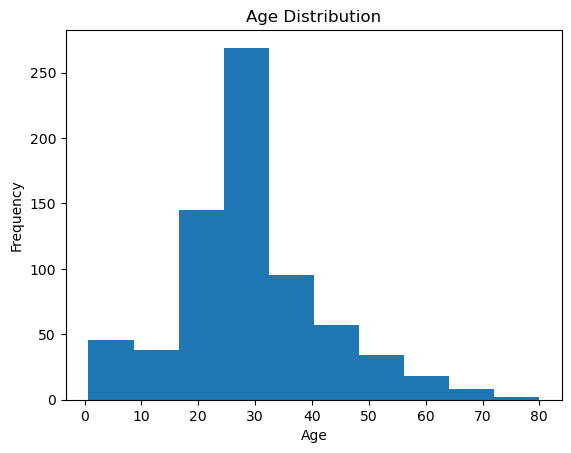

In [8]:
age_distribution = train_data['Age'].plot(kind='hist', title='Age Distribution', xlabel= 'Age' ,ylabel='Frequency', bins=10)

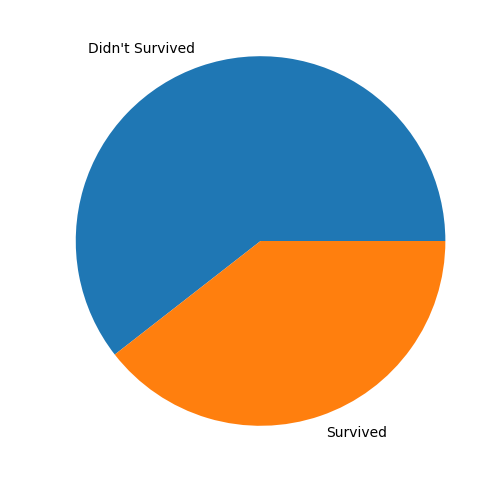

In [9]:
survival_distribution = train_data["Survived"].value_counts().plot.pie(labels=["Didn't Survived","Survived"],figsize = (6,6),ylabel = ' ')


Text(0, 0.5, 'Survival Rate')

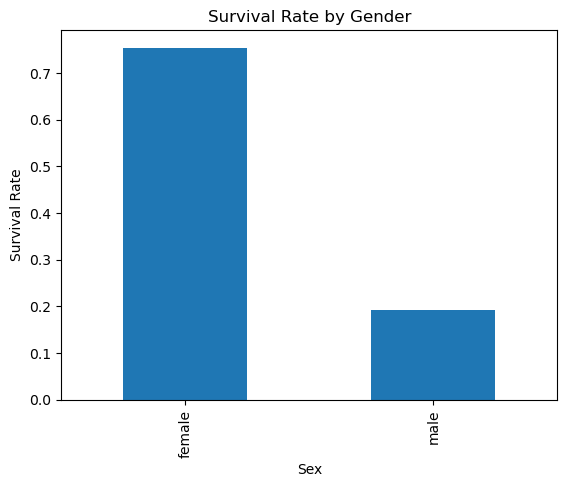

In [10]:
sex_labels = train_data['Sex'].map({0: 'female', 1: 'male'})

# Plotting the survival rate by gender using the copied and mapped values
survival_by_gender = train_data.groupby(sex_labels)['Survived'].mean().plot(kind='bar', title='Survival Rate by Gender')
survival_by_gender.set_ylabel('Survival Rate')

Text(0, 0.5, 'Survival Rate')

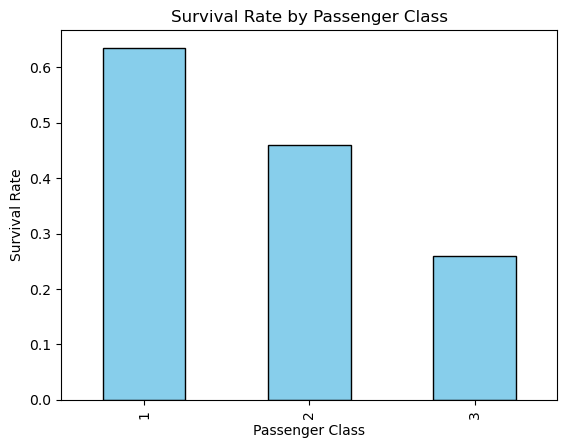

In [11]:
survival_by_class = train_data.groupby('Pclass')['Survived'].mean()

# Plot the survival rates by passenger class
ax = survival_by_class.plot(kind='bar', title='Survival Rate by Passenger Class', color='skyblue', edgecolor='black')
ax.set_xlabel('Passenger Class')
ax.set_ylabel('Survival Rate')

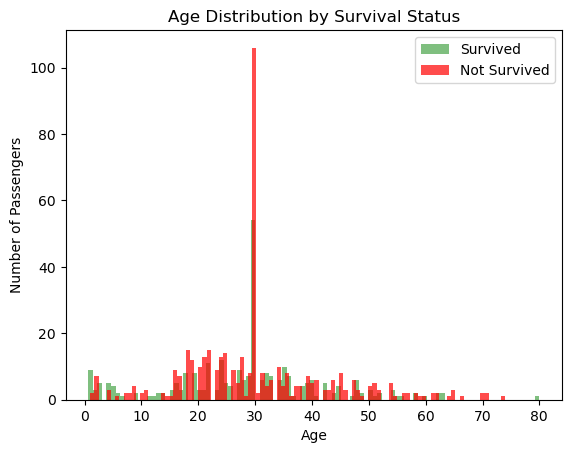

In [12]:
survived = train_data[train_data['Survived'] == 1]
not_survived = train_data[train_data['Survived'] == 0]

# Create the histogram plot
ax = survived['Age'].plot(kind='hist',bins = 100, alpha=0.5, label='Survived', color='g')
not_survived['Age'].plot(kind='hist',bins = 100, alpha=0.7, label='Not Survived', color='r', ax=ax)

# Add title and labels
ax.set_title('Age Distribution by Survival Status')
ax.set_xlabel('Age')
ax.set_ylabel('Number of Passengers')
ax.legend()

In [13]:
correlation_matrix = train_data.corr('pearson')
correlation_matrix.style.background_gradient(cmap='coolwarm')


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
Pclass,1.000000,0.126986,-0.319927,0.093572,0.048225,-0.543722,0.040708,-0.324024
Sex,0.126986,1.000000,0.089108,-0.079976,-0.242467,-0.183650,-0.124908,-0.550699
Age,-0.319927,0.089108,1.000000,-0.270404,-0.202725,0.071787,0.031524,-0.072729
SibSp,0.093572,-0.079976,-0.270404,1.000000,0.415491,0.136861,-0.049109,-0.031052
Parch,0.048225,-0.242467,-0.202725,0.415491,1.000000,0.151631,-0.072698,0.074699
Fare,-0.543722,-0.183650,0.071787,0.136861,0.151631,1.000000,0.078197,0.264345
Embarked,0.040708,-0.124908,0.031524,-0.049109,-0.072698,0.078197,1.000000,0.099162
Survived,-0.324024,-0.550699,-0.072729,-0.031052,0.074699,0.264345,0.099162,1.000000


In [14]:
def preprocess_data(data):
    data = data.drop_duplicates()
    data = pd.get_dummies(data, columns=['Pclass', 'Embarked'],drop_first=True)
    data = data.replace({True: 1, False: 0})
    data['Adult'] = data['Age'].apply(lambda age: 1 if age > 60 else 0)
    return data


train_data = preprocess_data(train_data)
test_data = preprocess_data(test_data)

In [15]:
train_data.head()

,Sex,Age,SibSp,Parch,Fare,Survived,Pclass_2,Pclass_3,Embarked_1,Embarked_2,Embarked_3,Adult
0,0,54.0,1,0,78.2667,1,0,0,1,0,0,0
1,0,45.0,0,0,13.5000,1,1,0,0,0,0,0
2,1,20.0,0,0,9.5000,0,0,1,0,0,0,0
3,1,36.0,0,0,7.8958,0,0,1,0,0,0,0
4,1,22.0,0,0,8.0500,0,0,1,0,0,0,0


In [16]:
X_train = train_data.drop(['Survived'], axis=1)
y_train = train_data['Survived']
X_test = test_data.drop(['Survived'], axis=1)
y_test = test_data['Survived']


In [17]:
X_test = X_test[X_train.columns]  # Reorder columns to match

In [18]:
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']

scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_train_scaled = X_train
X_test_scaled = X_test


In [19]:
X_test_scaled.head()

,Sex,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Embarked_1,Embarked_2,Embarked_3,Adult
0,1,0.390736,-0.5444,-0.506206,-0.533589,0,1,0,0,0,0
1,1,0.027558,-0.5444,-0.506206,-0.529751,0,1,0,0,0,0
2,1,0.005703,-0.5444,-0.506206,-0.390651,0,1,0,0,0,0
3,0,-0.626162,-0.5444,-0.506206,-0.520158,0,1,0,1,0,0
4,1,0.172829,-0.5444,-0.506206,0.415094,0,1,0,0,0,0


In [20]:
param_grid_knn = {
    'n_neighbors': list(range(3,20)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}

param_grid_dtree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 9, 11],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [21]:
models = {
    'KNN': (KNeighborsClassifier(), param_grid_knn),
    'Decision Tree': (DecisionTreeClassifier(), param_grid_dtree)
}

# Perform grid search and cross-validation for each model
results = []
cv_results = {}
scorer = make_scorer(f1_score)

for model_name, (model, param_grid) in models.items():


    grid_search = GridSearchCV(model, param_grid, cv=5, scoring=scorer) ##  Initialize GridSearchCV to perform grid search with 5-fold cross-validation and F1 score as the scoring metric
    grid_search.fit(X_train_scaled, y_train) ## Fit the grid search model on the training data 
    best_model = grid_search.best_estimator_ ## Get the best model found by grid search
    best_params = grid_search.best_params_  ## Get the best hyperparameters found by grid search
    f1_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring=scorer) ## Perform cross-validation to get F1 scores 
    mean_f1 = f1_scores.mean()
    highest_f1 = max(f1_scores)  ## Get the highest individual F1 score
    results.append({
        'Model': model_name, 
        'Best Parameters': best_params, 
        'Mean F1 Score': mean_f1,
        'Highest F1 Score': highest_f1
    })

    cv_results[model_name] = pd.DataFrame(grid_search.cv_results_)

# Create a DataFrame to compare results
results_df = pd.DataFrame(results)
results_df

,Model,Best Parameters,Mean F1 Score,Highest F1 Score
0,KNN,"{'metric': 'manhattan', 'n_neighbors': 11, 'we...",0.729617,0.745098
1,Decision Tree,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.728109,0.764706


In [22]:
all_combinations = pd.concat(cv_results.values(), ignore_index=True)
not_neccery_cols = ['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_metric', 'params']
all_combinations = all_combinations.drop(not_neccery_cols, axis=1)
all_combinations

,param_n_neighbors,param_weights,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split
0,3,uniform,0.687500,0.678571,0.716667,0.711538,0.704762,0.699808,0.014483,21,NaN,NaN,NaN,NaN
1,3,distance,0.630435,0.702703,0.672269,0.716981,0.666667,0.677811,0.030177,57,NaN,NaN,NaN,NaN
2,4,uniform,0.643678,0.646465,0.693069,0.673913,0.673684,0.666162,0.018624,68,NaN,NaN,NaN,NaN
3,4,distance,0.623656,0.678899,0.695652,0.691589,0.653846,0.668728,0.026847,65,NaN,NaN,NaN,NaN
4,5,uniform,0.694737,0.703704,0.733945,0.693069,0.700000,0.705091,0.014914,17,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,NaN,NaN,0.610526,0.712871,0.717949,0.733333,0.679245,0.690785,0.043842,79,entropy,11,2,5
188,NaN,NaN,0.610526,0.693878,0.745763,0.741573,0.679245,0.694197,0.049250,75,entropy,11,2,10
189,NaN,NaN,0.631579,0.720000,0.747664,0.729167,0.666667,0.699015,0.043151,64,entropy,11,4,2
190,NaN,NaN,0.631579,0.720000,0.747664,0.729167,0.666667,0.699015,0.043151,64,entropy,11,4,5


## Part 3 - Training flow
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 2)

In [23]:
# Training Flow: Use the best combination of feature engineering, model, and hyperparameters from the Experiment part

# Select Best Model

best_model_name = results_df.loc[results_df['Mean F1 Score'].idxmax(), 'Model']
best_model_params = results_df.loc[results_df['Mean F1 Score'].idxmax(), 'Best Parameters']


In [24]:
print(f"Chosen Model : {best_model_name} ,  Chosen Parameters : {best_model_params} ") 

Chosen Model : KNN ,  Chosen Parameters : {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'} 


In [25]:
if best_model_name == 'KNN':
    final_model = KNeighborsClassifier(**best_model_params)
elif best_model_name == 'Decision Tree':
    final_model = DecisionTreeClassifier(**best_model_params)

In [26]:
# Train final model on full training data with selected features
final_model.fit(X_train_scaled, y_train) 


KNeighborsClassifier(metric='manhattan', n_neighbors=11)

## Part 4 - Apply on test and show model performance estimation

In [27]:

# Apply: Apply on test and show model performance estimation

# Predict on test set
test_predictions = final_model.predict(X_test_scaled) 


In [28]:
test_f1 = f1_score(y_test, test_predictions)
print(f'Test F1 Score: {test_f1}')

Test F1 Score: 0.7758620689655172
